In [71]:
import numpy as np

def calculate_similarity(file_paths):
    # Liste zur Speicherung der Korrelationskoeffizienten
    correlations = []

    # Daten aus den Dateien laden und Korrelationskoeffizienten berechnen
    for i in range(len(file_paths)):
        data_i = np.genfromtxt(file_paths[i], delimiter=';', skip_header=1)
        x_i = data_i[:, 0]
        y_i = data_i[:, 1]

        for j in range(i+1, len(file_paths)):
            data_j = np.genfromtxt(file_paths[j], delimiter=';', skip_header=1)
            x_j = data_j[:, 0]
            y_j = data_j[:, 1]

            correlation_coefficient = np.corrcoef(x_i, y_i)[0, 1]
            correlations.append(correlation_coefficient)

            correlation_coefficient = np.corrcoef(x_j, y_j)[0, 1]
            correlations.append(correlation_coefficient)

    # Aggregatfunktion zur Berechnung der Gesamtmetrik (z.B. Durchschnitt)
    similarity_metric = np.mean(correlations)

    return similarity_metric


0.186681394876122
16.361271126362755


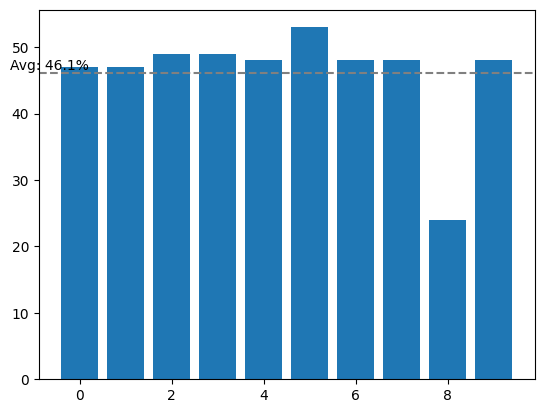

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Dateinamen der Pcap-Dateien
folderPath = r"C:\Users\Linus\git\cryptCorr\MainProject\IMSniff_Testbed_OpenTAP\bin\Debug x64\Results\Sammlung\Recording_ShortForReproduciability\RecordedData\prepro\pcaps"
file_names = os.listdir(folderPath)

print(calculate_similarity([os.path.join(folderPath, file_name) for file_name in file_names]))

eventCounts = []
for file_name in file_names:
    data = pd.read_csv(os.path.join(folderPath, file_name), delimiter=';')
    eventCounts.append(data.count()[0])

plt.bar(list(range(len(eventCounts))), eventCounts)
plt.axhline(np.average(eventCounts), color='gray', linestyle='--')
# Wert an der horizontalen Linie platzieren
plt.text(0.2, np.average(eventCounts)+0.05, "Avg: "+str(round(np.average(eventCounts),2))+"%", ha='right', va='bottom')
coefficient_of_variation = (np.std(eventCounts) / np.mean(eventCounts)) * 100
print(coefficient_of_variation)
plt.show()



In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
# Dateinamen der Pcap-Dateien
folderPath = r"C:\Users\Linus\git\cryptCorr\MainProject\IMSniff_Testbed_OpenTAP\bin\Debug x64\Results\Sammlung\Recording_ShortForReproduciability\RecordedData\prepro\pcaps"
file_names = os.listdir(folderPath)


# Listen zur Speicherung der Abweichungen
time_deviations = []
abs_timeDeviations =[]
TotalTimeDeviations =[]

size_deviations = []
abs_sizeDeviations=[]
TotalSizeDeviations = []

# Iteration über die Dateien
for file_name in file_names:
    # Daten aus der aktuellen Datei lesen
    data = pd.read_csv(os.path.join(folderPath,file_name), delimiter=';')
    SizeDeviationPerFile=[]
    TimeDeviationPerFile=[]
    # Iteration über die Einträge in der aktuellen Datei
    for index, row in data.iterrows():
        timestamp = row['timestamp']
        size = row[' size']
        
        # Iteration über die restlichen Dateien
        for other_file_name in file_names:
            # Nicht die gleiche Datei wie die aktuelle Datei überspringen
            if other_file_name == file_name:
                continue
            
            # Daten aus der anderen Datei lesen
            other_data = pd.read_csv(os.path.join(folderPath,other_file_name), delimiter=';')
            
            # Ähnlichen Eintrag in der anderen Datei finden
            similar_entry = other_data.loc[
                (other_data['timestamp'] >= timestamp - 3) & (other_data['timestamp'] <= timestamp + 3)
            ]
            
            if len(similar_entry) > 0:
                # Abweichungen berechnen und speichern
                  # Abweichungen berechnen und speichern
                # similar_entry['size_deviation'] = similar_entry[' size'] - size
                # similar_entry = similar_entry.sort_values(by='size_deviation')
                
                time_deviation = similar_entry['timestamp'].values[0] - timestamp
                size_deviation = similar_entry[' size'].values[0] - size
                time_deviations.append(time_deviation)
                size_deviations.append(size_deviation)

                TimeDeviationPerFile.append(time_deviation)
                abs_sizeDeviations.append(np.abs(size_deviation))
                SizeDeviationPerFile.append(size_deviation)
            #elif len(similar_entry) == 0:
                


    TotalSizeDeviations.append(SizeDeviationPerFile)
    TotalTimeDeviations.append(TimeDeviationPerFile)


C:\Users\Linus\AppData\Local\Temp\ipykernel_6024\256121201.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similar_entry['size_deviation'] = similar_entry[' size'] - size
C:\Users\Linus\AppData\Local\Temp\ipykernel_6024\256121201.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similar_entry['size_deviation'] = similar_entry[' size'] - size
C:\Users\Linus\AppData\Local\Temp\ipykernel_6024\256121201.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

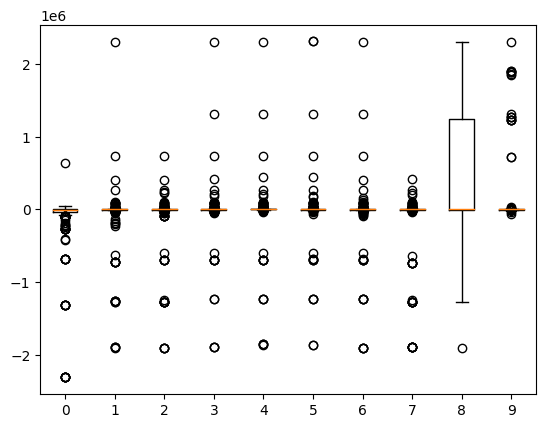

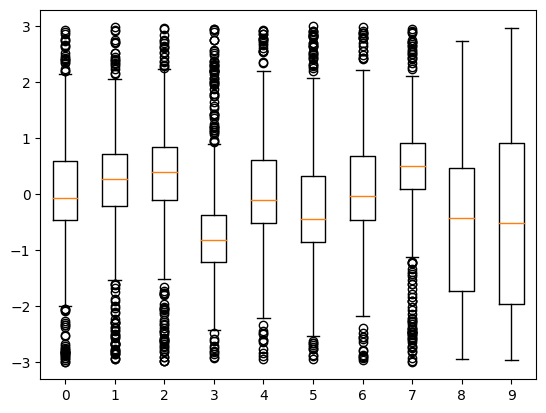

In [66]:
t = np.arange(0,len(TotalSizeDeviations),1)
labels = list(range(len(TotalSizeDeviations)))

plt.boxplot(TotalSizeDeviations, labels=labels)
plt.show()


t = np.arange(0,len(TotalTimeDeviations),1)
labels = list(range(len(TotalTimeDeviations)))

plt.boxplot(TotalTimeDeviations, labels=labels)
plt.show()
    

In [67]:


coefficient_of_variation = (np.std(TotalSizeDeviations) / np.mean(TotalSizeDeviations)) * 100
print(np.std(TotalSizeDeviations))

# Streudiagramm
deviations = [(x - np.mean(TotalSizeDeviations)) / -np.mean(TotalSizeDeviations) for x in TotalSizeDeviations]
plt.scatter(range(len(TotalSizeDeviations)), TotalSizeDeviations, c=deviations, cmap='coolwarm')
plt.axhline(np.mean(TotalSizeDeviations), color='gray', linestyle='--')
plt.colorbar(label='Abweichung')
plt.xlabel('Datenprobe')
plt.ylabel('Werte')
plt.title('Variationskoeffizient: {:.2f}%'.format(coefficient_of_variation))
plt.show()

plt.boxplot(TotalSizeDeviations)

plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (10,) + inhomogeneous part.

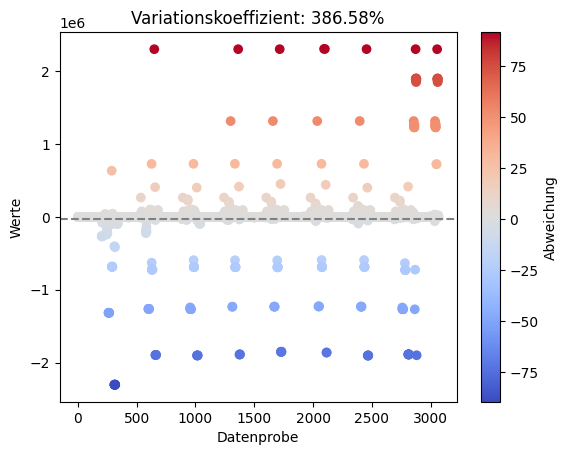

In [68]:
coefficient_of_variation = (np.std(abs_sizeDeviations) / np.mean(abs_sizeDeviations)) * 100
# Streudiagramm
deviations = [(x - np.mean(size_deviations)) / -np.mean(size_deviations) for x in size_deviations]
plt.scatter(range(len(size_deviations)), size_deviations, c=deviations, cmap='coolwarm')
plt.axhline(np.mean(size_deviations), color='gray', linestyle='--')
plt.colorbar(label='Abweichung')
plt.xlabel('Datenprobe')
plt.ylabel('Werte')
plt.title('Variationskoeffizient: {:.2f}%'.format(coefficient_of_variation))
plt.show()

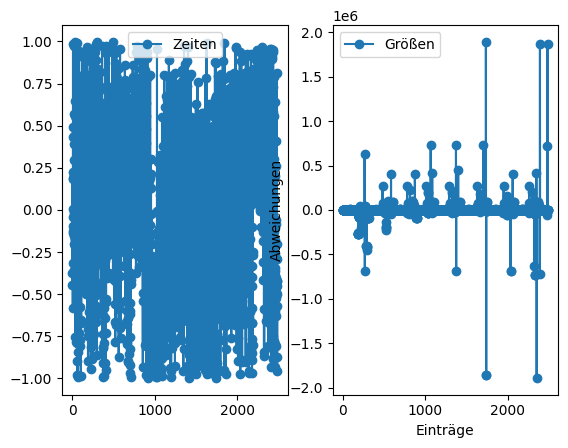

In [12]:
# Grafik erstellen
fig, ax = plt.subplots(1,2)

# Abweichungen der Zeiten plotten
ax[0].plot(time_deviations, marker='o', label='Zeiten')

# Abweichungen der Größen plotten
ax[1].plot(size_deviations, marker='o', label='Größen')

# Legende anzeigen
ax[0].legend()
ax[1].

# Achsentitel anzeigen
plt.xlabel('Einträge')
plt.ylabel('Abweichungen')

# Diagramm anzeigen
plt.show()
